In [1]:
from cr_knee_fit import experiments
from cr_knee_fit.elements import Element
from cr_knee_fit.fit_data import FitData

fit_data = FitData.load(
    experiments_detailed=experiments.direct_experiments + [experiments.grapes],
    experiments_all_particle=[experiments.lhaaso_epos, experiments.hawc],
    experiments_lnA=[experiments.lhaaso_epos],
    elements=Element.regular(),
    R_bounds=(7e2, 1e10),
)

/tmp/ipykernel_195358/4137604635.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


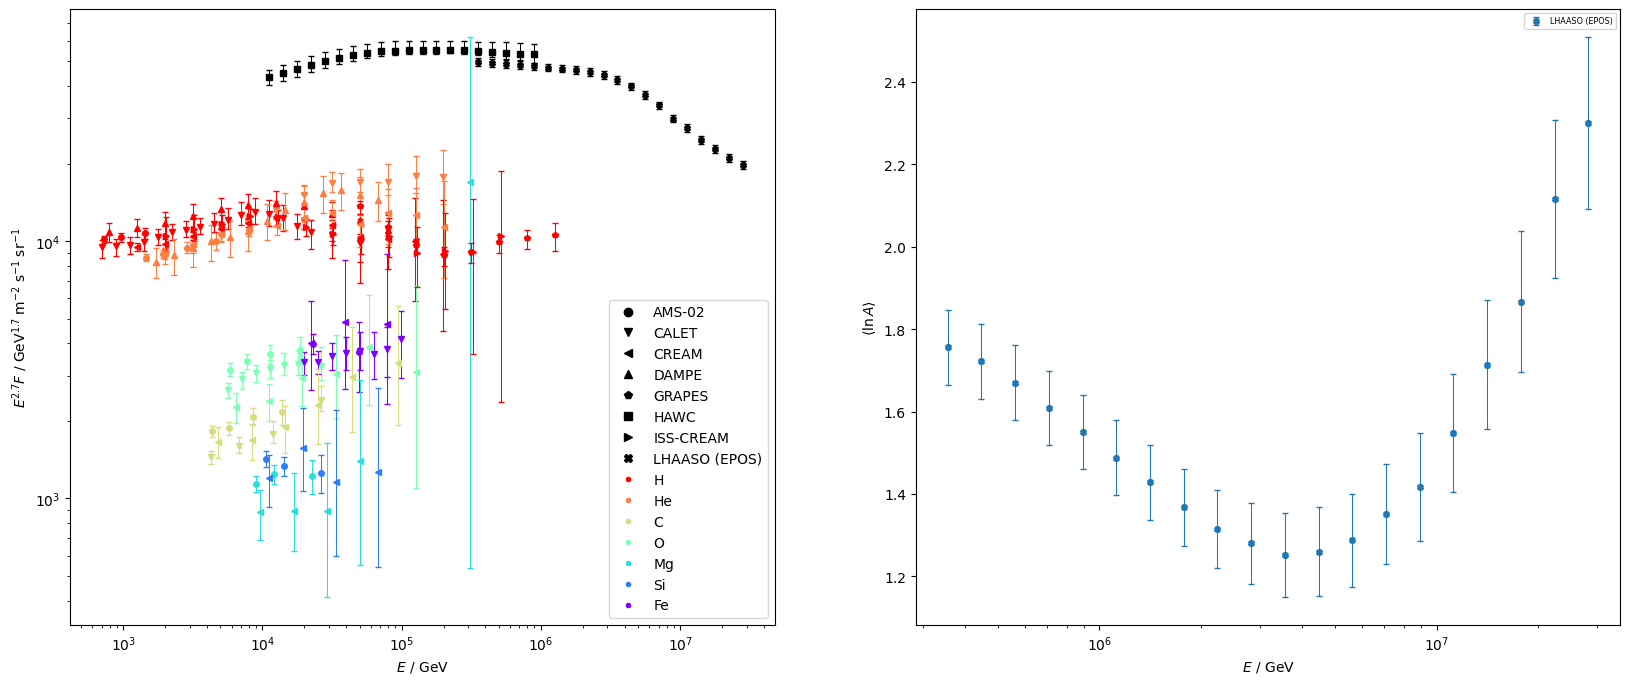

In [2]:
from matplotlib.lines import Line2D

from cr_knee_fit.utils import legend_with_added_items

fig = fit_data.plot(scale=2.7)
ax = fig.axes[0]
legend_with_added_items(
    ax,
    [(exp.legend_artist(), exp.name) for exp in sorted(fit_data.all_experiments())]
    + [
        (Line2D([], [], color=el.color, marker=".", linestyle="none"), el.name)
        for el in Element.regular()
    ],
)
fig.show()

In [1]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

from bayesian_analysis import FitConfig
from cr_knee_fit import experiments
from cr_knee_fit.elements import Element
from cr_knee_fit.model_ import Model

FIT_DIR = Path("out/composition-v4")
fc = FitConfig.model_validate_json((FIT_DIR / "config-dump.json").read_text())
theta_sample = np.loadtxt(FIT_DIR / "theta.txt")
median_model = Model.unpack(np.median(theta_sample, axis=0), layout_info=fc.model)

In [2]:
theta_sample.shape

(576, 21)

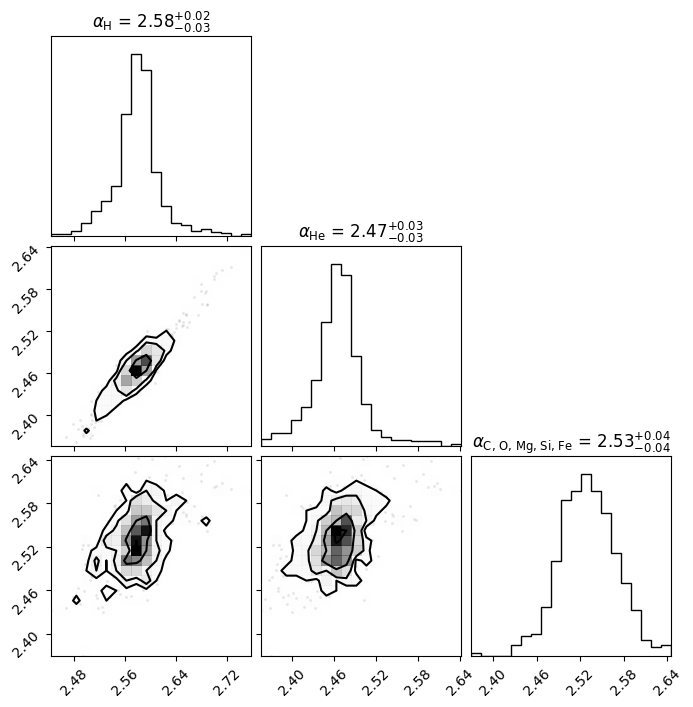

In [3]:
import corner

dims = [1, 3, 9]

alphas = theta_sample[:, dims]
titles = np.array(["$" + lbl + "$" for lbl in median_model.labels(True)])[dims]

fig = corner.corner(data=alphas, bins=20, titles=titles, show_titles=True)

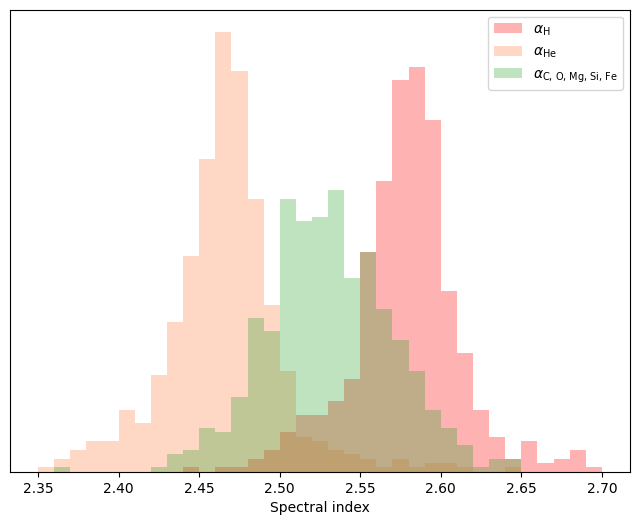

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.arange(2.35, 2.7, 0.01)
for alpha, title, color in zip(
    alphas.T,
    titles,
    (Element.H.color, Element.He.color, "tab:green"),
):
    ax.hist(
        alpha,
        label=title,
        bins=bins,
        color=color,
        alpha=0.3,
    )
ax.set_xlabel("Spectral index")
ax.set_yticks([])
ax.legend()